# Exercises - Week 3 - Generalized Linear Regression
#### Simon Lee, BIO-322, Machine Learning for Bioengineers, Winter 2022

## Conceptual
#### Exercise 1
Suppose we have a data set with three predictors, $X_1$ = Final $, $X_2$ = IQ, $X_3$ = Level (1 for College and 0 for High School).  The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get $\hat\beta_0 = 25, \hat\beta_1 = 2, \hat\beta_2 = 0.07, \hat\beta_3 = 15$.
   - Which answer is correct, and why?
      - For a fixed value of IQ and Final $, high school graduates earn more, on average, than college graduates.
      - For a fixed value of IQ and Final $, college graduates earn more, on average, than high school graduates.
   - Predict the salary of a college graduate with IQ of 110 and a Final $ of 4.0.

#### Solution

- For a fixed value of IQ and Final \$, college graduates earn 15 thousand dollars more, on average, than high school graduates.  We see this because $\hat\beta_3 = 15$ multiplies the education level, which is 1 for college graduates and 0 for high school graduates.
- The expected salary is given by $ \hat \beta_0 + \hat \beta_1 X_1 + \hat \beta_2 X_2 + \hat \beta_3 X_3 = 25 + 2 \times 4 + 0.07 \times 110 + 15 \times 1 = 55.7$ thousand dollars.

#### Exercise 2
Suppose we collect data for a group of students in a machine learning class with variables $X_1 =$ hours studied, $X_2 =$ $ in statistics class, and $Y =$ receive a 6 in the machine learning class. We fit a logistic regression and produce estimated coefficients, $\hat{\beta}_0 = -6$, $\hat{\beta}_1 = 0.025$, $\hat{\beta}_2 = 1$.
   - Estimate the probability that a student who studies for 75 hours and had a 4 in the statistics class gets a 6 in the machine learning class.
   - How many hours would the above student need to study to have a 50% chance of getting an 6 in the machine learning class?

#### Solution

- We have the input $X_1^\ast=75$, $X_2^\ast=4$. We plug this data point into our logistic regression model:
$`math
y = \frac{1}{1 + \exp\left[- \left(\hat{\beta}_0 + \hat{\beta}_1 X_1^\ast + \hat{\beta}_2 X_2^\ast \right)\right]} = \frac{1}{1 + \exp[- \left(-6 + 0.025 \cdot 75 + 1 \cdot 4 \right)]} = 0.47
$`
The probability for the student to get a $ 6 is approximately 47%.

- We set $y=0.5$ and solve for $X_1$ in our logistic regression model.
$`math
X_1 = \frac{\log\left[ \frac{y}{1-y} \right] - \hat{\beta}_0 - \hat{\beta}_2 X_2^\ast}{\hat{\beta}_1} = \frac{\log\left[ \frac{0.5}{1-0.5} \right] + 6 - 1 \cdot 4}{0.025} = 80
$`
The student would have to work 80 hours to reach a 50% probability of getting a $ 6.

#### Exercise 3
In this exercise we will familiarize ourselves with the loss function implicitly defined by maximum likelihood estimation of the parameters in a classification setting with multiple classes. Remember that the input $f(x)$ of the softmax function $s$ is a vector-valued function. Here we assume a linear function $f$ and write the $i$th component of this function as $f_i(x) = \theta_{i0} + \theta_{i1}x_1 + \cdots + \theta_{ip}x_p$. Note that each component $i$ has now its own parameters $\theta_{i0}$ to $\theta_{ip}$. Using matrix multiplication we can also write $f(x) = \theta x$ where $\theta = \left(\begin{array}{ccc}\theta_{10} & \cdots & \theta_{1p}\\\vdots & \ddots & \cdots\\\theta_{K0} & \cdots & \theta_{Kp}\end{array}\right)$ is a $K\times(p+1)$ dimensional matrix and $x = (1, x_1, x_2, \ldots, x_p)$ is a column vector of length $p+1$.
- Write the log-likelihood function for a classification problem with $n$ data points, $p$ input dimensions and $K$ classes and simplify the expression as much as you can. *Hint*: to simplify the notation we can use the convention $s_y(f(x)) = P(y|x)$ to write the conditional probability of class $y$ given input $x$ and $\theta_{y_ij}$ for the parameter in the $y_i$th row and $j$th column of the parameter matrix. This convention makes sense when the classes are identified by the integers $1, 2, \ldots, K$; in this case $s_y(f(x))$ is the $y$th component of $s(f(x))$. Otherwise we would could specify a mapping from classes $C_1, C_2, \ldots, C_K$ to the integers $1, 2, \ldots, K$ for this convention to make sense.
- Assume now $K = 3$ and $p = 2$. Explicitly write the log-likelihood function for the training set $\mathcal D = ((x_1 = (0, 0), y_1 = C), (x_2 = (3, 0), y_2 = A), (x_3 = (0, 2), y_3 = B))$. *Hint:* Choose yourselve a mapping from classes $A, B, C$ to indices $1, 2, 3$.
- Assume $K = 2$ and $p = 1$ and set $\theta_{20} = 0$ and $\theta_{21} = 0$. Show that we recover standard logistic regression in this case. *Hint*: show that $s_1(f(x)) = \sigma(f_1(x))$ and $s_2(f(x)) = 1 - \sigma(f_1(x))$, where $s$ is the softmax function and $\sigma(x) = 1/(1 + e^{-x})$ is the logistic function.
- Show that one can always set $\theta_{K0}, \theta_{K1}, \ldots, \theta_{Kp}$ to zero. *Hint* Show that the softmax function with the transformed parameters $\tilde\theta_{ij}=\theta_{ij} - \theta_{Kj}$ has the same value as the softmax function in the original parameters.

#### Solution

*
$$
\begin{align*}
\log\ell(\theta) &= \sum_{i=1}^n\log P(y_i|x_i, \theta)\\
&= \sum_{i=1}^n\log\left(s_{y_i}(f(x_i))\right)\\
&\scriptsize[we use the definition of the softmax function ]s(x_i) = \frac{e^{x_i}}{\sum_{j=1}^Ke^{x_j}}\\
    &\scriptsize[and the properties of the log-function] \log\left(\frac{a}b\right) = \log(a) - \log(b)[ and ] \log(e^x) = x\normalsize\\
&= \sum_{i=1}^n f_{y_i}(x_i) - \log\left(\sum_{j=1}^Ke^{f_j(x_i)}\right)\\
& = \sum_{i=1}^n \theta_{y_i0} + \theta_{y_i1}x_{i1} + \cdots + \theta_{y_ip}x_{ip} - \log\left(\sum_{j=1}^Ke^{(\theta x_i)_j}\right)
\end{align*}
$$

* We will use the mapping: class $A \to 1$, class $B\to 2$, class $C \to 3$.
$$
\begin{align*}
\log\ell(\theta) =& \sum_{i=1}^3\log P(y_i|x_i, \theta)\\
=& \sum_{i=1}^3 \theta_{y_i0} + \theta_{y_i1}x_{i1} + \theta_{y_i2}x_{i2} - \log\left(\sum_{j=1}^Ke^{(x_i\theta)_j}\right)\\
=&\ \theta_{30}  - \log\left(e^{\theta_{10}} + e^{\theta_{20}} + e^{\theta_{30}}\right) +\\
&
+ \theta_{10} + \theta_{11}3  -\log\left(e^{\theta_{10} + \theta_{11}3} + e^{\theta_{20} + \theta_{21}3} + e^{\theta_{30} + \theta_{31}3}\right) + \\
& +\theta_{20} + \theta_{22}2 - \log\left(e^{\theta_{10} + \theta_{12}2}+e^{\theta_{20} + \theta_{22}2}+e^{\theta_{30} + \theta_{32}2}\right)
\end{align*}
$$
*
$$
\begin{align*}
    s_1(f(x)) &= \frac{e^{\theta_{10} + \theta_{11} x}}{e^{0} + e^{\theta_{10} + \theta_{11} x}}\\
&=\frac{e^{\theta_{10} + \theta_{11} x}}{1 + e^{\theta_{10} + \theta_{11} x}}\\
&=\frac1{ e^{-\theta_{10} - \theta_{11} x} + 1}\\
&=\sigma(f_1(x))
\end{align*}
$$

$$
\begin{align*}
    s_2(f(x)) &= \frac{1}{1 + e^{\theta_{10} + \theta_{11} x}}\\
    &= \frac{1 + e^{\theta_{10} + \theta_{11} x} - e^{\theta_{10} + \theta_{11} x}}{1 + e^{\theta_{10} + \theta_{11} x}}\\
    & = 1 - \frac{e^{\theta_{10} + \theta_{11} x}}{1 + e^{\theta_{10} + \theta_{11} x}}\\
&=1 - \frac1{ e^{-\theta_{10} - \theta_{11} x} + 1}\\
&=1 - \sigma(f_1(x))
\end{align*}
$$

* We note that $\tilde \theta_{K0} = \cdots = \tilde\theta_{Kp}= 0$.
$$
\begin{align*}
    \frac{e^{\tilde\theta_{i0} + \tilde\theta_{i1}x_1 + \cdots + \tilde \theta_{ip}x_p}}{\sum_{j=1}^Ke^{\tilde\theta_{j0} + \tilde\theta_{j1}x_1 + \cdots + \tilde \theta_{jp}x_p}} &= \frac{e^{\theta_{i0} + \theta_{i1}x_1 + \cdots + \theta_{ip}x_p - \theta_{K0} - \theta_{K1}x_1 - \cdots - \theta_{Kp}x_p}}{\sum_{j=1}^Ke^{\theta_{j0} + \theta_{j1}x_1 + \cdots + \theta_{jp}x_p - \theta_{K0} - \theta_{K1}x_1 - \cdots - \theta_{Kp}x_p}}\\
    &= \frac{e^{\theta_{i0} + \theta_{i1}x_1 + \cdots + \theta_{ip}x_p}e^{- \theta_{K0} - \theta_{K1}x_1 - \cdots - \theta_{Kp}x_p}}{e^{ - \theta_{K0} - \theta_{K1}x_1 - \cdots - \theta_{Kp}x_p}\sum_{j=1}^Ke^{\theta_{j0} + \theta_{j1}x_1 + \cdots + \theta_{jp}x_p}}\\
    &= \frac{e^{\theta_{i0} + \theta_{i1}x_1 + \cdots + \theta_{ip}x_p}}{\sum_{j=1}^Ke^{\theta_{j0} + \theta_{j1}x_1 + \cdots + \theta_{jp}x_p}}
\end{align*}
$$
Because of this result we also say that the effective number of free parameters is $(K-1)\times (p+1)$ for a classification setting with $K$ classes and $p$ parameters.

## Applied
#### Exercise 4
In the multiple linear regression of the weather data set above we used all
   available predictors. We do not know if all of them are relevant. In this exercise our aim is to find models with fewer predictors and quantify the loss in prediction accuracy.
- Systematically search for the model with at most 2 predictors that has the lowest test rmse. *Hint* write a function `train_and_evaluate` that takes the training and the test data as input as well as an array of two predictors; remember that `data[:, [\"A\", \"B\"]]` returns a sub-dataframe with columns \"A\" and \"B\". This function should fit a `LinearRegressor` on the training set with those two predictors and return the test rmse for the two predictors. To get a list of all pairs of predictors you can use something like `predictors = setdiff(names(train), ["time", "LUZ_wind_peak"]); predictor_pairs = [[p1, p2] for p1 in predictors, p2 in predictors if p1 != p2 && p1 > p2]`
- How much higher is the test error compared to the fit with all available predictors?
- How many models did you have to fit to find your result above?
- How many models would you have to fit to find the best model with at most 5 predictors? *Hint* the function `binomial` may be useful.
"""

In [4]:
begin
    using Pkg
    Pkg.activate(joinpath(Pkg.devdir(), "MLCourse"))
    using CSV, DataFrames, MLJ, MLJLinearModels
end

  Activating project at `~/.julia/dev/MLCourse`


In [5]:
begin
    train = CSV.read(joinpath(@__DIR__, "..", "data", "weather2015-2018.csv"),
                     DataFrame)
    test = CSV.read(joinpath(@__DIR__, "..", "data", "weather2019-2020.csv"),
                    DataFrame)
end;

In [6]:
coerce!(train, Count => Continuous); coerce!(test, Count => Continuous);

In [7]:
function run_and_evaluate(train, test, predictor_names)
    m = fit!(machine(LinearRegressor(),
                     train[1:end-5, predictor_names],
                     train.LUZ_wind_peak[6:end]), verbosity = 0)
	rmse(predict(m, test[1:end-5, predictor_names]),
         test.LUZ_wind_peak[6:end])
end

run_and_evaluate (generic function with 1 method)

In [8]:
begin
	predictors = setdiff(names(train), ["time", "LUZ_wind_peak"])
	predictor_pairs = [[p1, p2] for p1 in predictors, p2 in predictors if p1 != p2 && p1 > p2]
end

1485-element Vector{Vector{String}}:
 ["GVE_wind_peak", "BAS_wind_peak"]
 ["GVE_pressure", "BAS_wind_peak"]
 ["GVE_temperature", "BAS_wind_peak"]
 ["GVE_precipitation", "BAS_wind_peak"]
 ["GVE_sunshine_duration", "BAS_wind_peak"]
 ["GVE_wind_mean", "BAS_wind_peak"]
 ["GVE_wind_direction", "BAS_wind_peak"]
 ["GUT_wind_peak", "BAS_wind_peak"]
 ["GUT_pressure", "BAS_wind_peak"]
 ["GUT_temperature", "BAS_wind_peak"]
 ["GUT_precipitation", "BAS_wind_peak"]
 ["GUT_sunshine_duration", "BAS_wind_peak"]
 ["GUT_wind_mean", "BAS_wind_peak"]
 ⋮
 ["LUZ_sunshine_duration", "CHU_wind_direction"]
 ["LUZ_wind_mean", "CHU_wind_direction"]
 ["LUZ_wind_direction", "CHU_wind_direction"]
 ["PUY_wind_peak", "CHU_wind_direction"]
 ["PUY_pressure", "CHU_wind_direction"]
 ["PUY_temperature", "CHU_wind_direction"]
 ["PUY_precipitation", "CHU_wind_direction"]
 ["PUY_sunshine_duration", "CHU_wind_direction"]
 ["PUY_wind_mean", "CHU_wind_direction"]
 ["PUY_wind_direction", "CHU_wind_direction"]
 ["CHU_wind_peak", "

In [9]:
results = [run_and_evaluate(train, test, p) for p in predictor_pairs]

1485-element Vector{Float64}:
  9.840214431869878
 10.202092829866407
 10.175517197921877
 10.204682680977246
 10.163965468855432
  9.91469879625729
 10.209039339513813
  9.900928135993373
 10.16140269015422
 10.153249652592349
 10.216199521700505
 10.138848895630025
 10.005713481020564
  ⋮
 11.695051765289211
 10.367603731668519
 11.745391942269839
 11.037518736098889
 11.632799948020267
 11.788552825341455
 11.743621699121794
 11.728240113035493
 11.253127984446092
 11.380520716303133
 11.599693800051332
 11.643536583898124

In [10]:
findmin(results)

(9.779212590652675, 26)

In [11]:
predictor_pairs[26]

2-element Vector{String}:
 "LUZ_wind_mean"
 "BAS_wind_peak"

- The best test error with only two predictors is 9.78 - 8.91 = 0.87 higher than the test error of the full model, i.e. it is a bit less than 10% higher.

In [12]:
length(predictor_pairs)

1485

In [13]:
length(predictors) |> p -> p*(p-1) ÷ 2

1485

The number of evaluated models was ${p\choose 2} = \frac{p(p-1)}2 = 1485$.

To test all models with 5 predictors one would have to fit ${p\choose 5} = 341055$ models.

#### Exercise 5
- Read the section on [scientific types in the MLJ manual](https://alan-turing-institute.github.io/MLJ.jl/dev/getting_started/#Data-containers-and-scientific-types).
- Coerce the `count` variable of the bike sharing data to `Continuous` and fit a linear model (`LinearRegressor`) with predictors `:temp` and `:humidity`. 
Create a scatter plot with the true counts `bikesharing.count` on the x-axis and the predicted mode (`predict_mode`) of the counts for the linear regression model and the Poisson model on the y-axis. If the model perfectly captures the data, the plotted points should lie on the diagonal; you can add `plot!(identity)` to the figure to display the diagonal.
Comment on the differences you see in the plot between the Poisson model and the linear regression model.
"""

In [14]:
import MLJGLMInterface: LinearCountRegressor

In [15]:
bikesharing = OpenML.load(42712, maxbytes = 10^5) |> DataFrame

,season,year,month,hour,holiday,weekday,workingday,weather,temp
,Cat…?,Float64?,Float64?,Float64?,Cat…?,Float64?,Cat…?,Cat…?,Float64?
1,spring,0.0,1.0,0.0,False,6.0,False,clear,9.84
2,spring,0.0,1.0,1.0,False,6.0,False,clear,9.02
3,spring,0.0,1.0,2.0,False,6.0,False,clear,9.02
4,spring,0.0,1.0,3.0,False,6.0,False,clear,9.84
5,spring,0.0,1.0,4.0,False,6.0,False,clear,9.84
6,spring,0.0,1.0,5.0,False,6.0,False,misty,9.84
7,spring,0.0,1.0,6.0,False,6.0,False,clear,9.02
8,spring,0.0,1.0,7.0,False,6.0,False,clear,8.2
9,spring,0.0,1.0,8.0,False,6.0,False,clear,9.84


In [16]:
dropmissing!(bikesharing);

In [17]:
coerce!(bikesharing, :count => Count);

In [18]:
m4 = machine(LinearCountRegressor(),
	         select(bikesharing, [:temp, :humidity]),
             bikesharing.count);

In [19]:
fit!(m4, verbosity = 0);

In [20]:
bike_poisson_predict = predict_mode(m4)

1296-element Vector{Int64}:
 47
 46
 46
 50
 50
 50
 46
 42
 50
 59
 67
 61
 72
  ⋮
 86
 88
 82
 77
 69
 60
 55
 55
 47
 47
 47
 47

In [21]:
coerce!(bikesharing, :count => Continuous);

In [22]:
bike_mach = machine(LinearRegressor(),
                    select(bikesharing, [:temp, :humidity]),
                    bikesharing.count);

In [23]:
fit!(bike_mach, verbosity = 0);

In [24]:
bike_linreg_predict = predict_mode(bike_mach)

1296-element Vector{Float64}:
 48.30223195600549
 45.73984724740062
 45.73984724740062
 52.22999174672915
 52.22999174672915
 52.22999174672915
 45.73984724740062
 38.59507611628483
 52.22999174672915
 64.44341047651045
 74.09444449768688
 67.60429999835836
 79.87384054668388
  ⋮
 90.516232110913
 92.48011200627482
 87.29922077052086
 82.11832953476687
 74.3189317718638
 65.21028074538619
 58.664014427513436
 58.664014427513436
 47.591483505673985
 47.591483505673985
 47.591483505673985
 47.591483505673985

In [26]:
using Plots

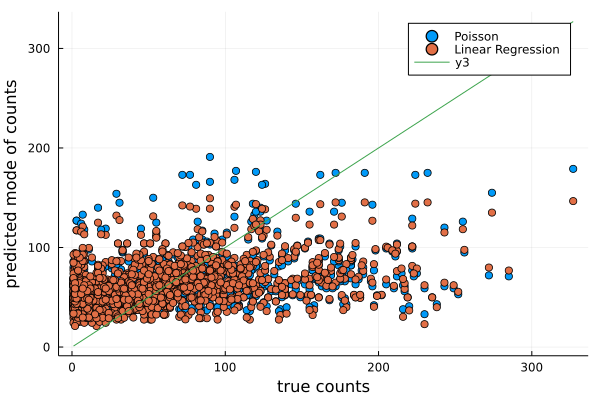

In [27]:
let
	scatter(bikesharing.count, bike_poisson_predict, label = "Poisson")
	scatter!(bikesharing.count, bike_linreg_predict, label = "Linear Regression")
	plot!(identity, xlabel = "true counts", ylabel = "predicted mode of counts")
end

- Both models seem to overestimate the mode for small counts and underestimate the mode for large counts. The Poisson model, however, is slightly better at predicting high counts.

#### Exercise 6
In this exercise we perform linear classification of the MNIST handwritten digits
   dataset.
   - Load the MNIST data set with `using OpenML; mnist = OpenML.load(554) |> DataFrame; dropmissing!(mnist);`
   - Usually the first 60'000 images are taken as training set, but for this exercise I recommend to use fewer rows, e.g. the first 5000.
   - Scale the input values to the interval [0, 1) with `mnist[:, 1:784] ./= 255`
   - Fit a `MLJLinearModels.MultinomialClassifier(penalty = :none)` to the data. Be patient! This can take a few minutes.
   - Compute the misclassification rate and the confusion matrix on the training set.
   - Use as test data rows 60001 to 70000 and compute the misclassification rate
     and the confusion matrix on this test set.
   - Plot some of the correctly classified test images.
   - Plot some of the wrongly classified training and test images.
     Are they also difficult for you to classify?

In [28]:
using OpenML

In [30]:
# Dataset is massive. Run  if you want. Code should work
begin
    mnist = OpenML.load(554) |> DataFrame
    dropmissing!(mnist)
    mnist[:, 1:28^2] ./= 255
end

In [ ]:
mnist_mach = machine(MultinomialClassifier(penalty = :none),
                     select(mnist[1:10000, :], Not(:class)),
	                 mnist.class[1:10000]) |> fit!

In [ ]:
mnist_pred_train = predict_mode(mnist_mach, select(mnist[1:10000, :], Not(:class)))

In [ ]:
mean(mnist_pred_train .!= mnist.class[1:10000])

In [ ]:
confusion_matrix(mnist_pred_train, mnist.class[1:10000])

In [ ]:
mnist_pred_test = predict_mode(mnist_mach, select(mnist[60001:end, :], Not(:class)))

In [ ]:
mean(mnist_pred_test .!= mnist.class[60001:end])

In [ ]:
confusion_matrix(mnist_pred_test, mnist.class[60001:end])

In [ ]:
misclassified_idxs = findall(mnist_pred_test .!= mnist.class[60001:end])

In [ ]:
DataFrame(predicted = mnist_pred_test[misclassified_idxs], actual = mnist.class[misclassified_idxs .+ 60000])

In [ ]:
using Plots

In [ ]:
plot(Gray.(reshape(Array(mnist[misclassified_idxs[1] + 60000, 1:end-1]), 28, 28)'))

- The actual label for this image was 5 and the machine predicted 6.